## Section 1: EDA + Machine Learning

### Problem Description:

The project aims to predict fraudulent credit card transactions using machine learning models, a critical task for both banks and customers. Banks face financial losses for every fraudulent transaction since they are held accountable. The dataset includes transactions over two days in September 2013 by European credit cardholders.

 With only 0.172% of transactions being fraudulent, the data is highly imbalanced. Addressing this imbalance is essential in model development, and various algorithms will be tested to identify the most effective one.


In [ ]:
# Importing the basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading and understanding the data

In [ ]:
# Reading the dataset
df = pd.read_csv('/content/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Handling missing values

#### Handling missing values in columns

In [ ]:
# Checking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
Time,0.0
V16,0.0
Amount,0.0
V28,0.0
V27,0.0
V26,0.0
V25,0.0
V24,0.0
V23,0.0
V22,0.0


It’s clear that all columns are complete, with no missing values. Therefore, the dataset is free from any null value issues.

### Checking the distribution of the classes

In [ ]:
classes = df['Class'].value_counts()
classes

,count
Class,
0,284315
1,492


In [ ]:
genuine_percentage = round((classes[0]/df['Class'].count()*100),2)
genuine_percentage

99.83

In [ ]:
fraud_percentage = round((classes[1]/df['Class'].count()*100),2)
fraud_percentage

0.17

The calculated fraud rate is 0.19%, while the rate for genuine transactions is 99.91%.

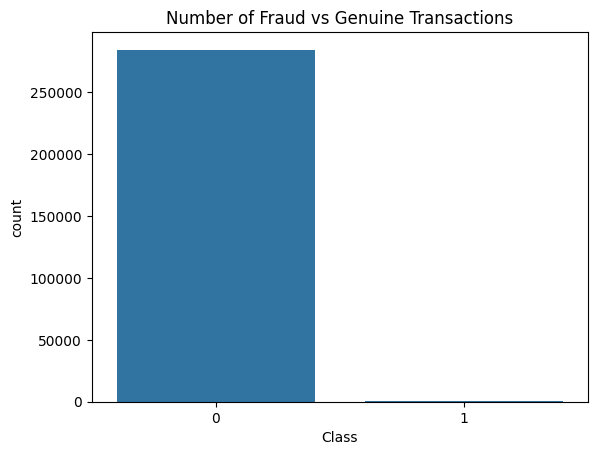

In [ ]:
# Bar plot for the Number of Fraud vs Genuine Transcations
sns.countplot(x='Class', data=df)
plt.title('Number of Fraud vs Genuine Transactions')
plt.show()

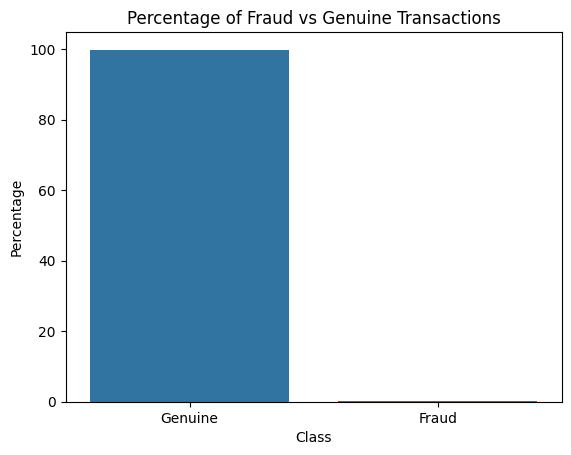

In [ ]:
# Bar plot for the percentage of Fraud vs Genuine Transactions
percentages = {'Class':['Genuine', 'Fraud'],
                    'Percentage':[genuine_percentage, fraud_percentage]
                    }

df_percentages = pd.DataFrame(percentages)
sns.barplot(x='Class',y='Percentage', data=percentages)
plt.title('Percentage of Fraud vs Genuine Transactions')
plt.show()

## Outliers treatment

We won't be doing any outlier treatment for this dataset since all columns have already undergone PCA transformation. This transformation assumes that outlier values were addressed during the data processing.

### Observe the distribution of classes with time

In [ ]:
# Creating fraud dataframe
data_fraud = df[df['Class'] == 1]
# Creating genuine dataframe
data_genuine = df[df['Class'] == 0]

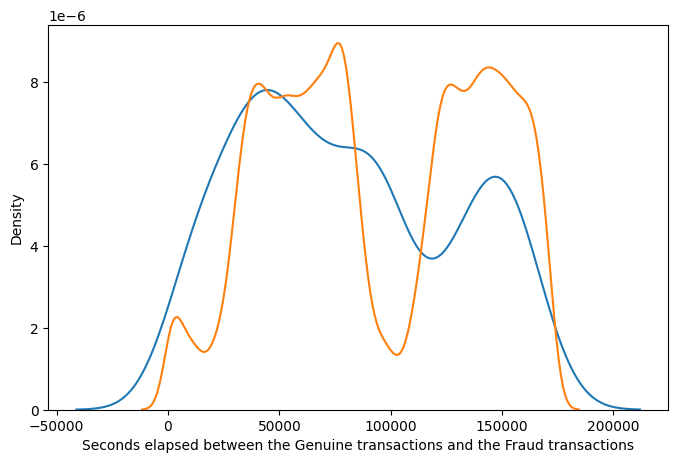

In [ ]:
# Time Distribution plot
plt.figure(figsize=(8,5))
ax = sns.kdeplot(data_fraud['Time'],label='Fraud')
ax = sns.kdeplot(data_genuine['Time'],label='Genuine')
ax.set(xlabel='Seconds elapsed between the Genuine transactions and the Fraud transactions')
plt.show()

##### Analysis
There doesn't seem to be any distinct pattern for Fraud versus Genuine transactions related to Time. Therefore, we can safely drop the Time column.

In [ ]:
# Dropping the Time column
df.drop('Time', axis=1, inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Observe the distribution of classes with amount

<ipython-input-15-f52fe6283728>:3: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=10`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  ax = sns.kdeplot(data_fraud['Amount'],label='Fraud',color='red',bw=10)
<ipython-input-15-f52fe6283728>:4: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=10`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  ax = sns.kdeplot(data_genuine['Amount'],label='Genuine',color='blue',bw=10)


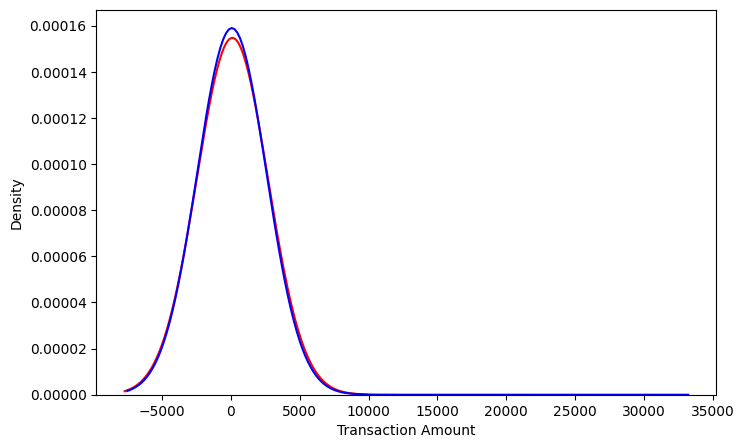

In [ ]:
# Amount Distribution plot
plt.figure(figsize=(8,5))
ax = sns.kdeplot(data_fraud['Amount'],label='Fraud',color='red',bw=10)
ax = sns.kdeplot(data_genuine['Amount'],label='Genuine',color='blue',bw=10)
ax.set(xlabel='Transaction Amount')
plt.show()

##### Analysis


In [ ]:
# Import library
from sklearn.model_selection import train_test_split
# Putting feature variables into X without Class Column
X = df.drop(['Class'], axis=1)
# Putting Class variable to y as Target
y = df['Class']
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

## Feature Scaling
Only the 'Amount' column needs scaling, as the rest have already been scaled through PCA transformation.

In [ ]:
# Standardization method
from sklearn.preprocessing import StandardScaler

In [ ]:
scalerr=StandardScaler()

In [ ]:
# Fit the data into scaler and transform
X_train['Amount'] = scalerr.fit_transform(X_train[['Amount']])

In [ ]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
201788,2.023734,-0.429219,-0.691061,-0.201461,-0.162486,0.283718,-0.674694,0.192230,1.124319,-0.037763,...,-0.171390,-0.195207,-0.477813,0.340513,0.059174,-0.431015,-0.297028,-0.000063,-0.046947,-0.345273
179369,-0.145286,0.736735,0.543226,0.892662,0.350846,0.089253,0.626708,-0.049137,-0.732566,0.297692,...,0.206709,-0.124288,-0.263560,-0.110568,-0.434224,-0.509076,0.719784,-0.006357,0.146053,-0.206439
73138,-3.015846,-1.920606,1.229574,0.721577,1.089918,-0.195727,-0.462586,0.919341,-0.612193,-0.966197,...,0.842838,0.274911,-0.319550,0.212891,-0.268792,0.241190,0.318445,-0.100726,-0.365257,0.358043
208679,1.851980,-1.007445,-1.499762,-0.220770,-0.568376,-1.232633,0.248573,-0.539483,-0.813368,0.785431,...,-0.196551,-0.406722,-0.899081,0.137370,0.075894,-0.244027,0.455618,-0.094066,-0.031488,0.362400
206534,2.237844,-0.551513,-1.426515,-0.924369,-0.401734,-1.438232,-0.119942,-0.449263,-0.717258,0.851668,...,-0.045417,0.050447,0.125601,0.215531,-0.080485,-0.063975,-0.307176,-0.042838,-0.063872,-0.316109


##### Scaling the test set
When working with the test set, we only apply the scaler, not fit it. This ensures we use the same scaling parameters as the training data.

In [ ]:
# Transform the test set
X_test['Amount'] = scalerr.transform(X_test[['Amount']])
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
49089,1.229452,-0.235478,-0.627166,0.419877,1.797014,4.069574,-0.896223,1.036103,0.745991,-0.147304,...,-0.057922,-0.170060,-0.288750,-0.130270,1.025935,0.847990,-0.271476,0.060052,0.018104,-0.340485
154704,2.016893,-0.088751,-2.989257,-0.142575,2.675427,3.332289,-0.652336,0.752811,1.962566,-1.025024,...,-0.147619,-0.184153,-0.089661,0.087188,0.570679,0.101899,0.620842,-0.048958,-0.042831,-0.320859
67247,0.535093,-1.469185,0.868279,0.385462,-1.439135,0.368118,-0.499370,0.303698,1.042073,-0.437209,...,0.437685,0.028010,-0.384708,-0.128376,0.286638,-0.136700,0.913904,-0.083364,0.052485,0.853442
251657,2.128486,-0.117215,-1.513910,0.166456,0.359070,-0.540072,0.116023,-0.216140,0.680314,0.079977,...,-0.227278,-0.357993,-0.905085,0.223474,-1.075605,-0.188519,0.267672,-0.071733,-0.072238,-0.344410
201903,0.558593,1.587908,-2.368767,5.124413,2.171788,-0.500419,1.059829,-0.254233,-1.959060,0.948915,...,0.249457,-0.035049,0.271455,0.381606,0.332001,-0.334757,0.448890,0.168585,0.004955,-0.229480


## Checking the Skewness

<ipython-input-22-67e01d8698e8>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-22-67e01d8698e8>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-22-67e01d8698e8>:10: UserWarning: 

`distplot` is a deprecated function and will be remov

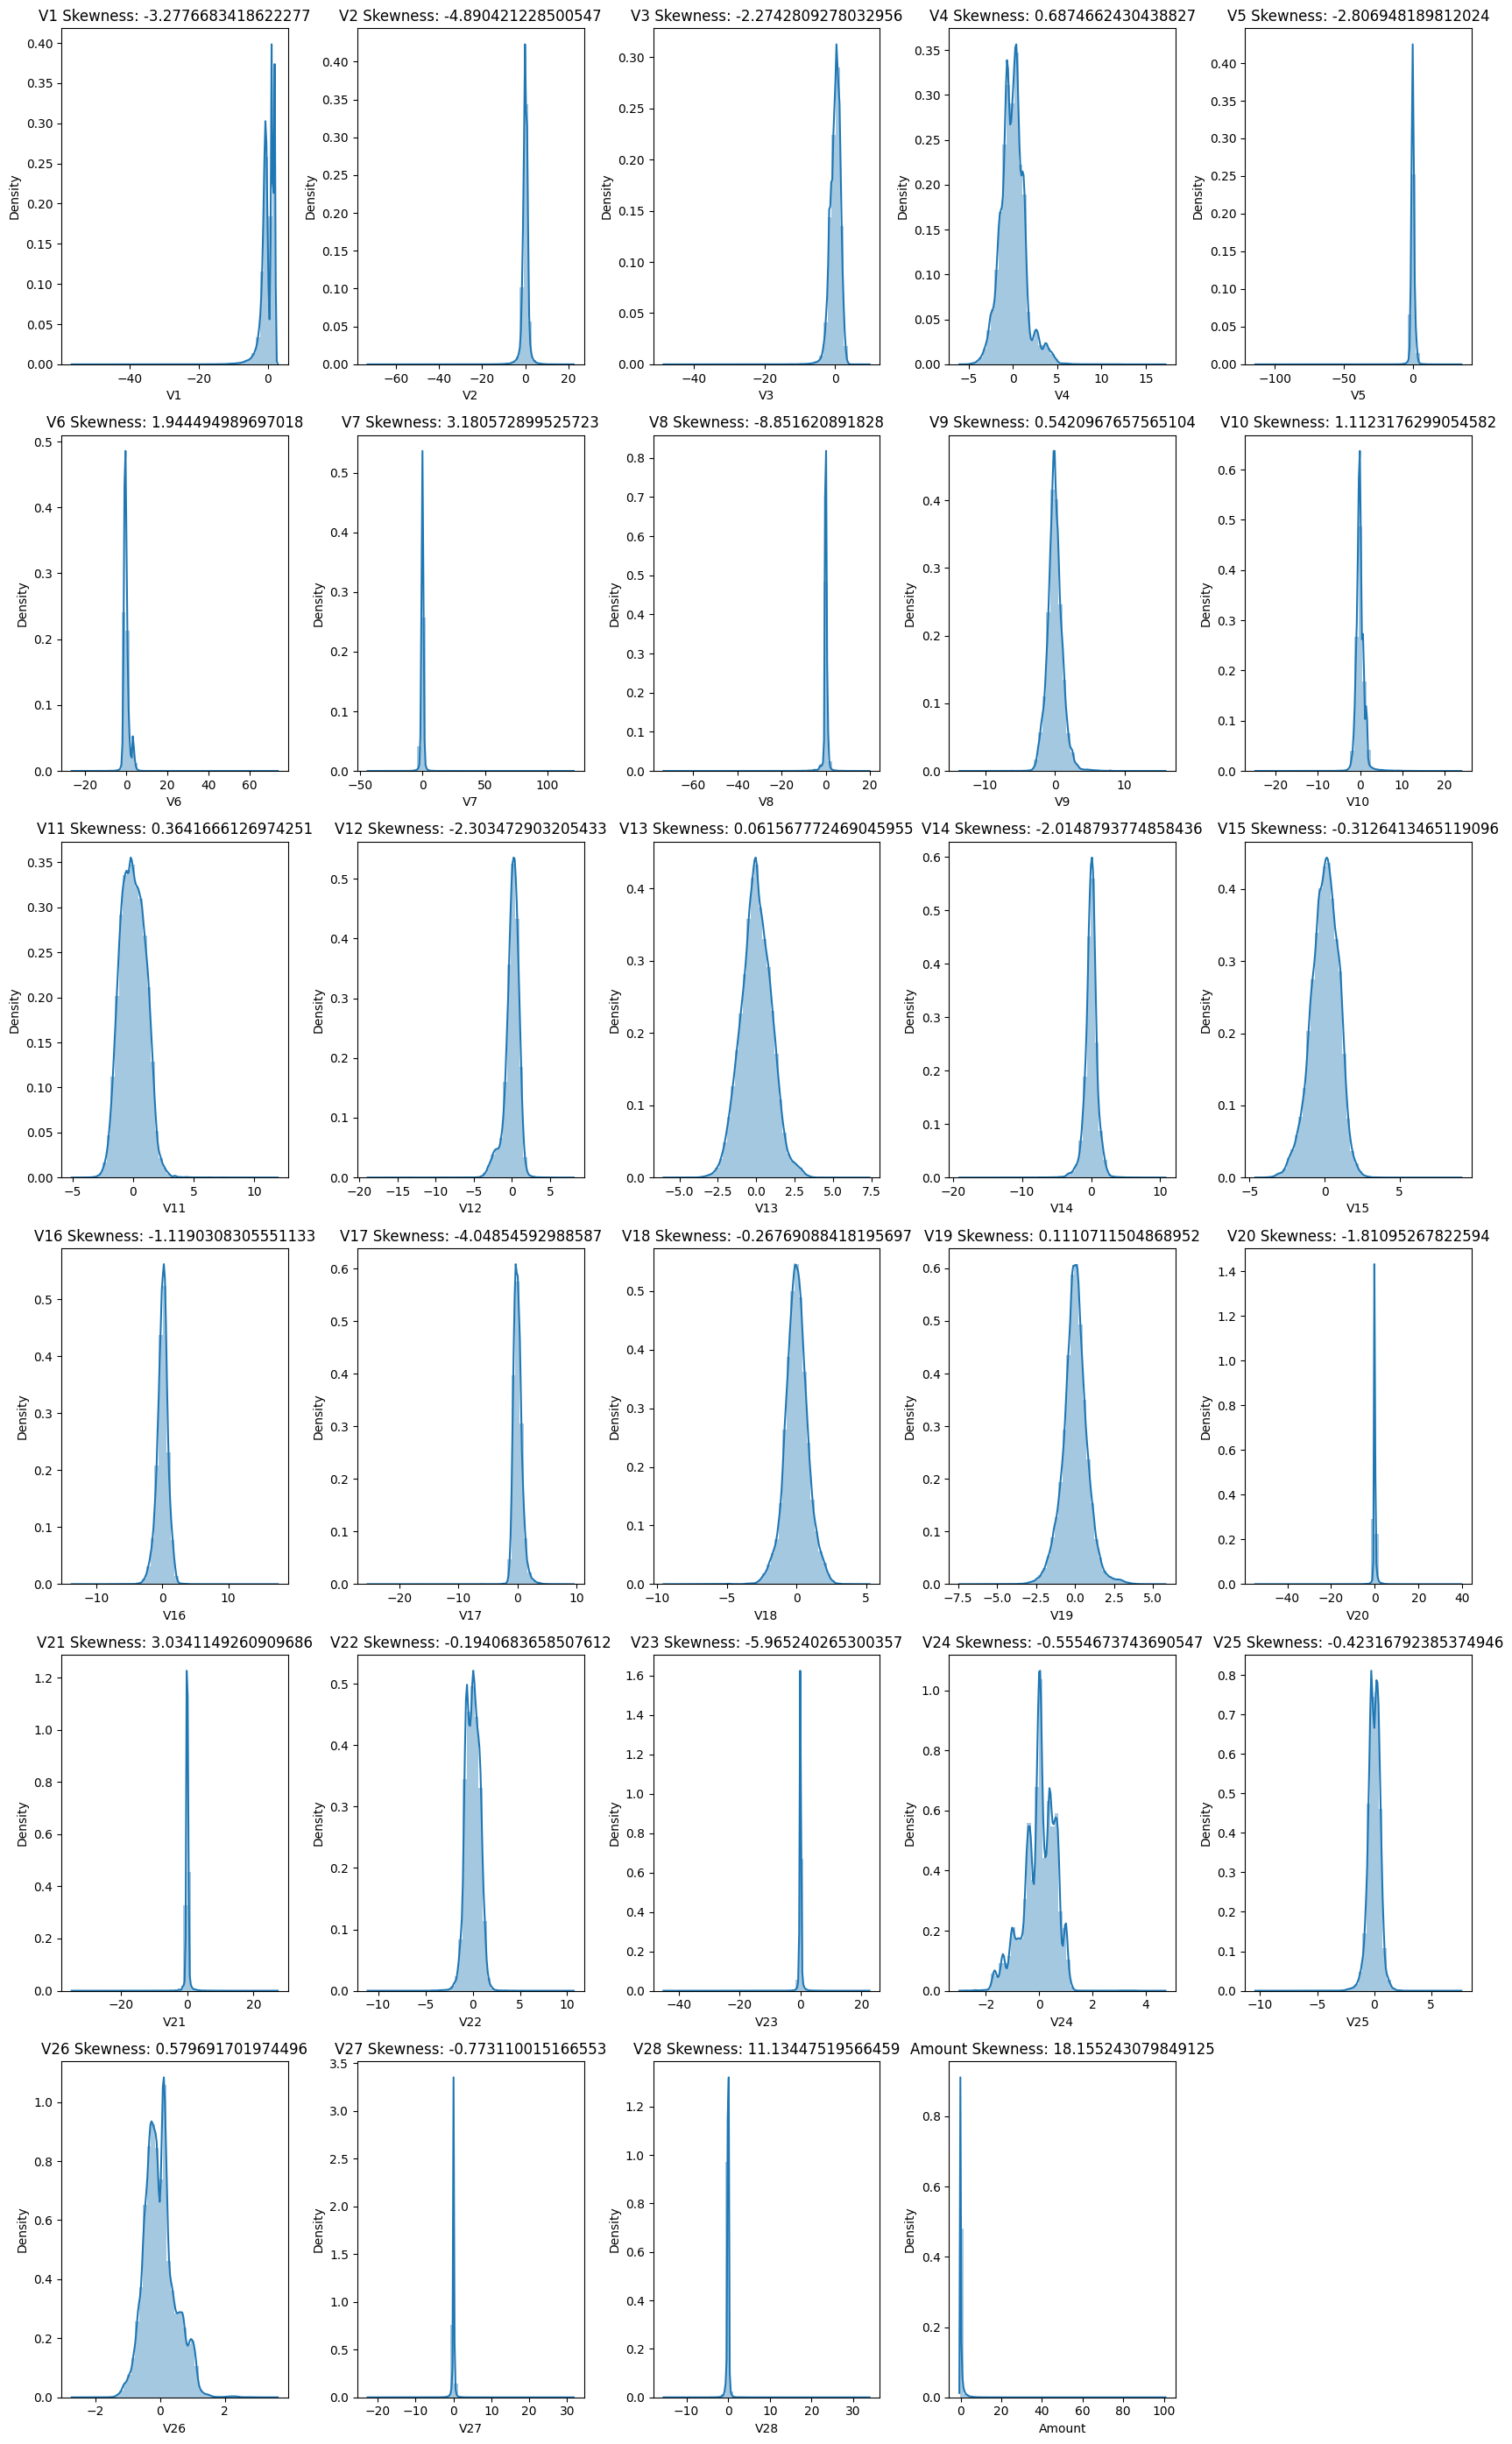

In [ ]:
# Plotting the distribution of the variables (skewness) of all the columns
cols = X_train.columns

k = 0
plt.figure(figsize=(17, 28))

for col in cols:
    k = k + 1
    plt.subplot(6, 5, k)
    sns.distplot(X_train[col])
    plt.title(col + ' Skewness: ' + str(X_train[col].skew()))

plt.tight_layout()
plt.show()


We see that there are many variables, which are heavily skewed. We will mitigate the skewness only for those variables for bringing them into normal distribution.

### Mitigate skweness with PowerTransformer

In [ ]:
# Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer
# Instantiate the powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
# Fit and transform the PT on training data
X_train[cols] = pt.fit_transform(X_train)

In [ ]:
# Transform the test set
X_test[cols] = pt.transform(X_test)

<ipython-input-25-3b1c8732d220>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-25-3b1c8732d220>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-25-3b1c8732d220>:7: UserWarning: 

`distplot` is a deprecated function and will be removed 

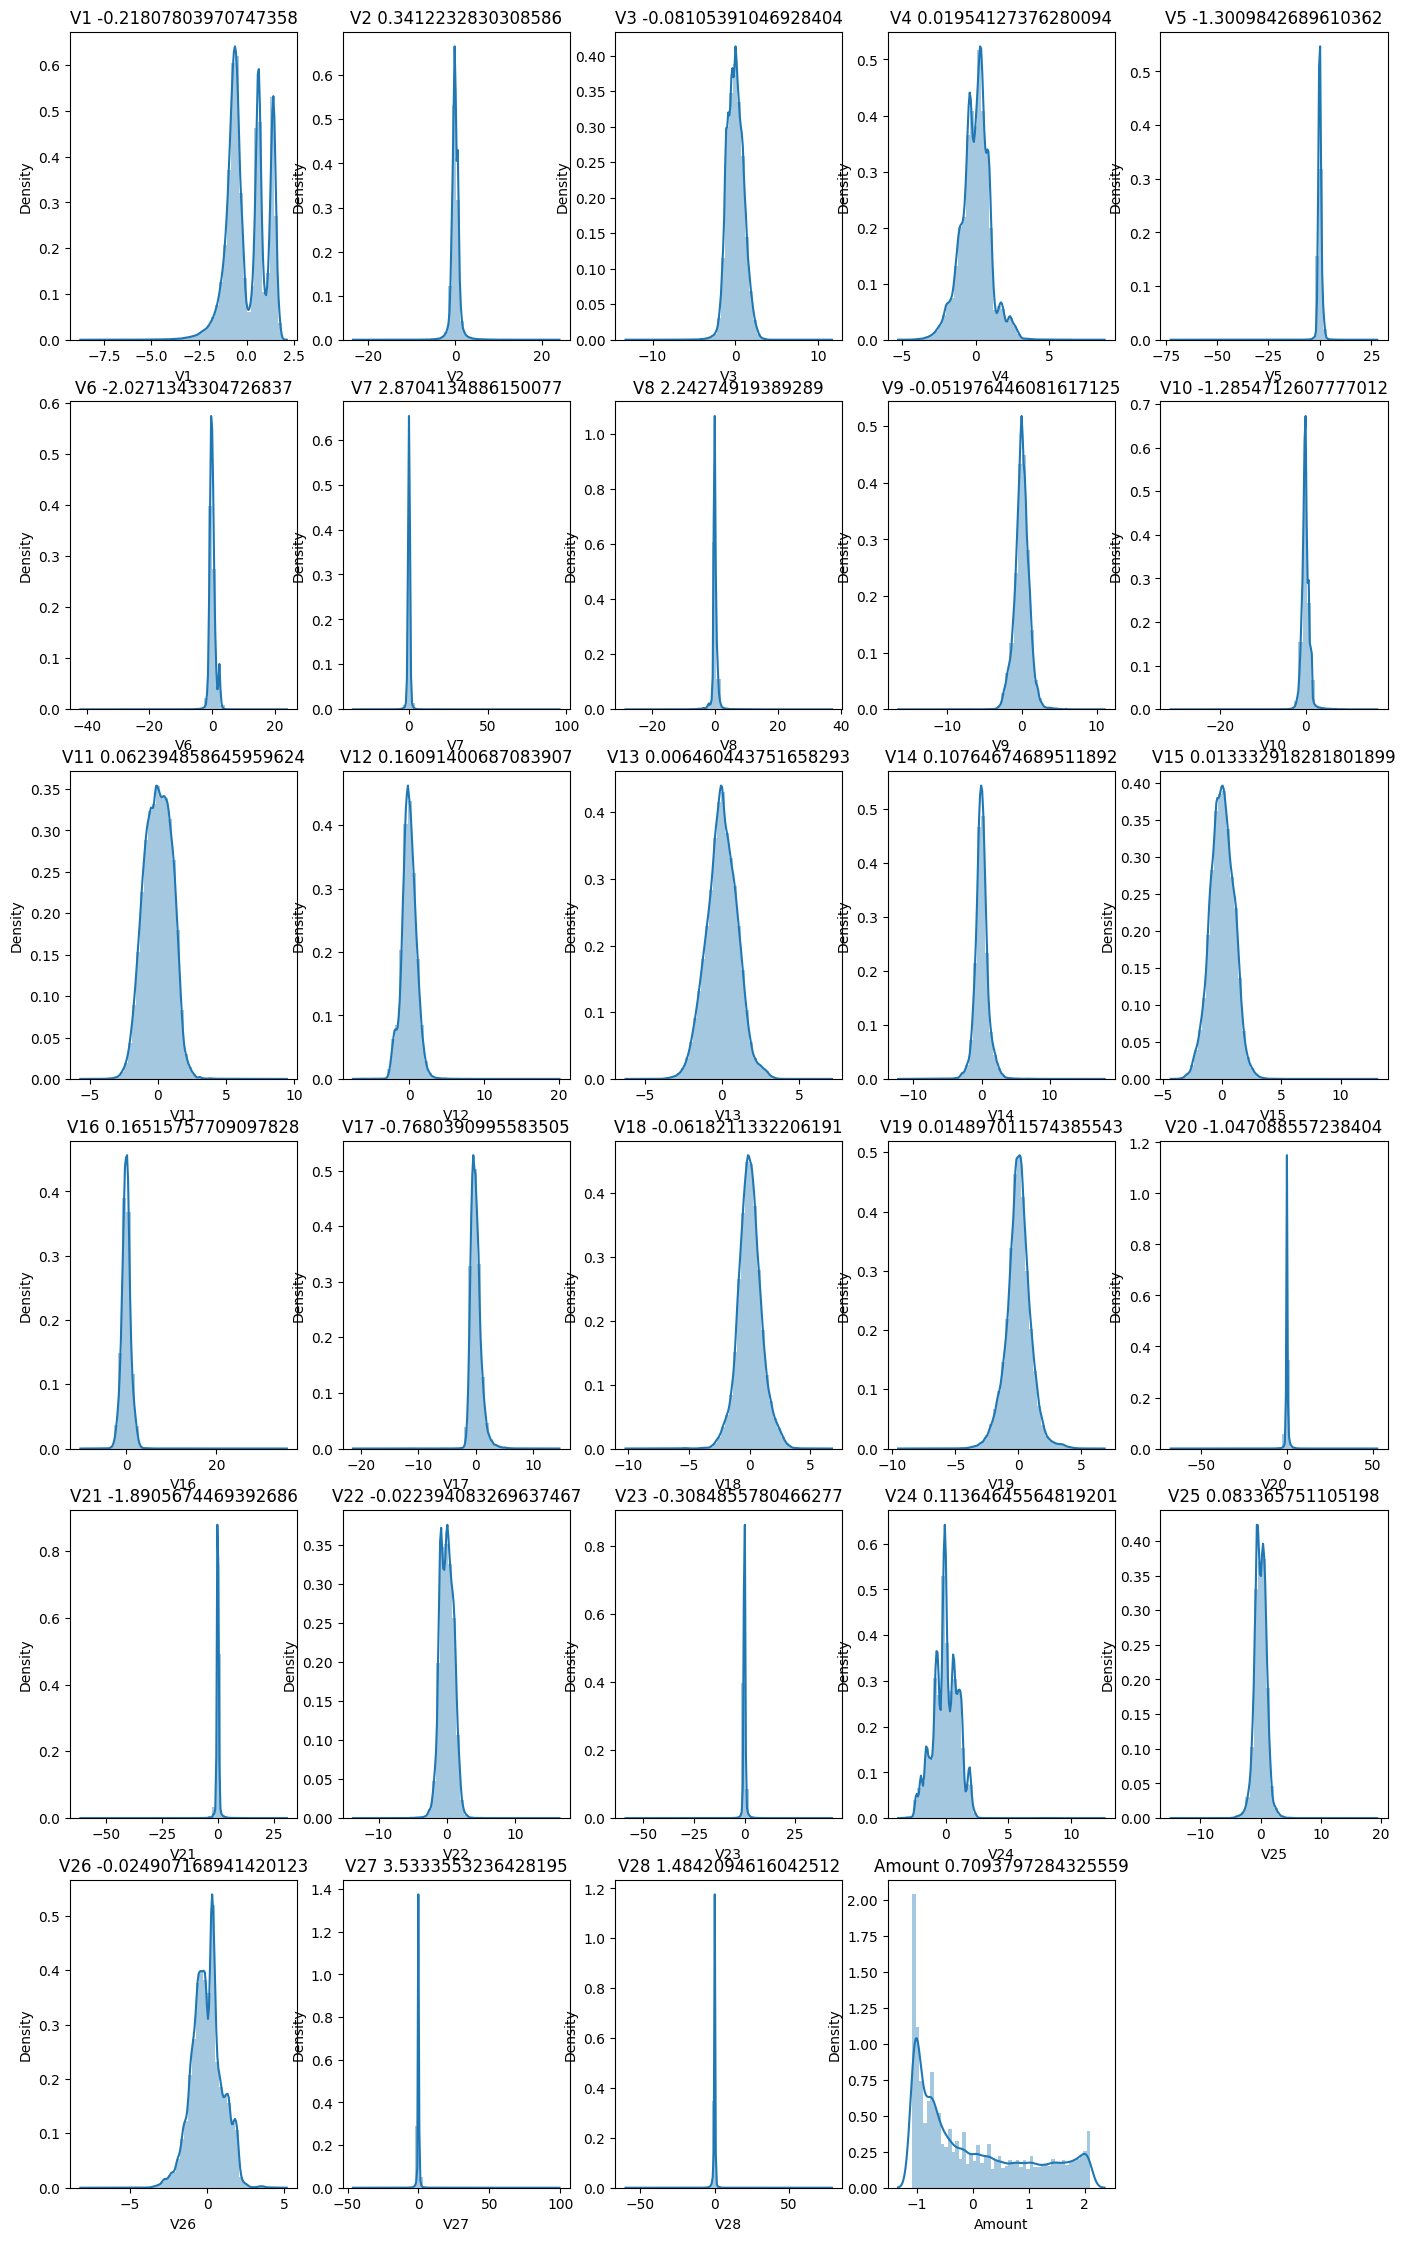

In [ ]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :
    k=k+1
    plt.subplot(6, 5,k)
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

Now we can see that all the variables are normally distributed after the transformation.

## Section 2: Logistic Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = df.copy()

In [ ]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Number of outliers in Amount: 31904


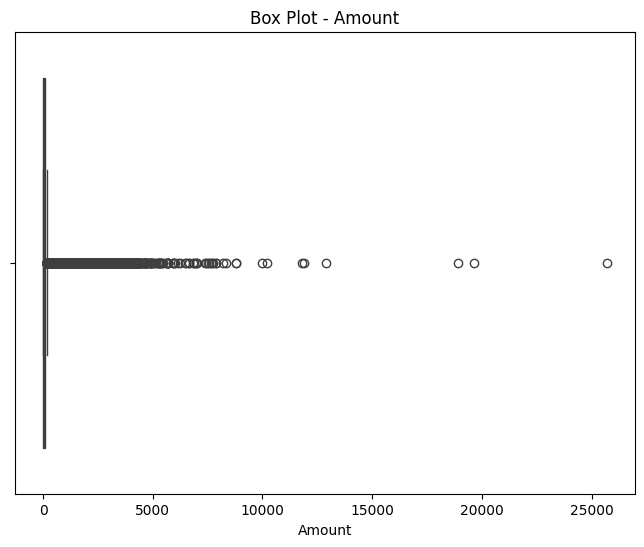

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to identify outliers using the IQR method
def detect_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers

# Function to visualize outliers with box plots for selected features
def plot_boxplots(data, features):
    for feature in features:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=data[feature])
        plt.title(f'Box Plot - {feature}')
        plt.show()

# Specify features to analyze for outliers
features_to_check = ['Amount']

# Identify outliers in the 'Amount' feature
outliers_amount = detect_outliers_iqr(data, 'Amount')
print(f'Number of outliers in Amount: {len(outliers_amount)}')

# Create box plots for the chosen features
plot_boxplots(data, features_to_check)

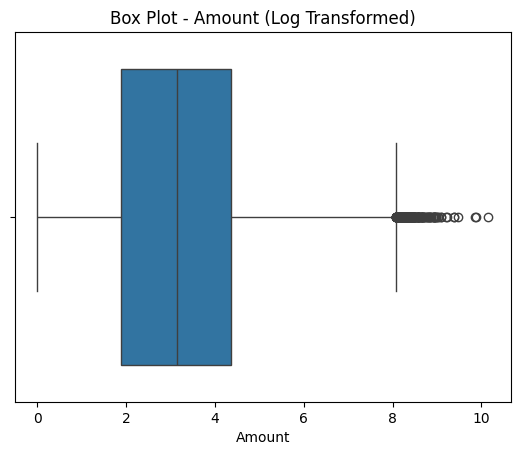

In [ ]:
data_log_transformed = data.copy()
data_log_transformed['Amount'] = np.log1p(data_log_transformed['Amount'])
# Create a boxplot for the log-transformed 'Amount'
sns.boxplot(x=data_log_transformed['Amount'])
plt.title('Box Plot - Amount (Log Transformed)')
plt.show()

[[83374  1921]
 [   18   130]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.88      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443



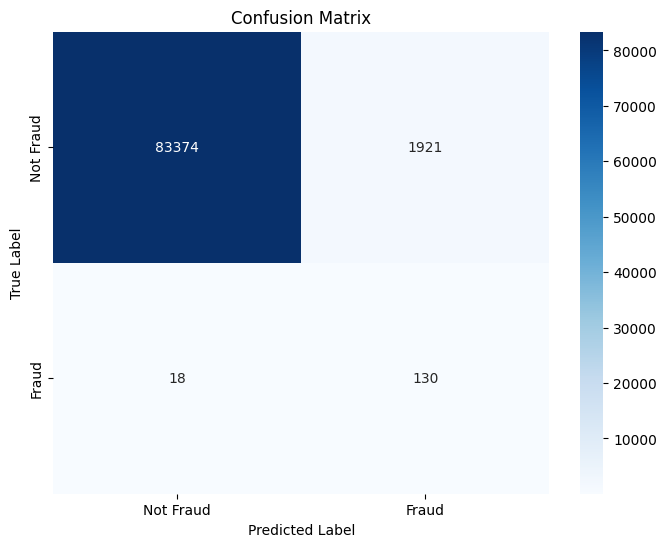

In [ ]:
# Load and prepare data
X = data_log_transformed.drop('Class', axis=1)
y = data_log_transformed['Class']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train_scaled, y_train)

def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Plot confusion matrix using seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=['Not Fraud', 'Fraud'],
    yticklabels=['Not Fraud', 'Fraud'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

# Evaluate the model
y_pred = model.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

LogisticRegression(C=10, max_iter=1000, solver='liblinear')
[[85280    15]
 [   56    92]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.86      0.62      0.72       148

    accuracy                           1.00     85443
   macro avg       0.93      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



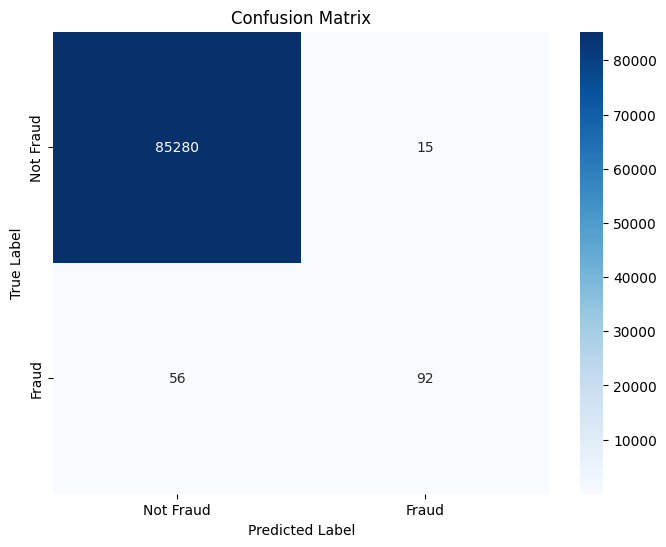

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
'C': [0.01, 0.1, 1, 10, 100],
'solver': ['liblinear', 'lbfgs'],
'class_weight': ['balanced', None]
}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, scoring='f1', cv=5)
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_
print(best_model)
y_pred_best = best_model.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))
plot_confusion_matrix(y_test, y_pred_best)

## Section 3: Random Forest

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = df.copy()

In [ ]:
# data  = pd.read_csv(r"/content/creditcard.csv")

In [ ]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:

X = data.drop('Class', axis=1)
y = data['Class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.3, random_state=0)
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

y_pred=rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the random tree : {accuracy:.2f}")

print("classification report:")
print(classification_report(y_test,y_pred))

print("confusion matrix")
print(confusion_matrix(y_test,y_pred))


Accuracy of the random tree : 1.00
classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.94      0.76      0.84       147

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

confusion matrix
[[85289     7]
 [   35   112]]


## Section 4: Decision Tree

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
data = df.copy()

In [ ]:
# Load your dataset
file_path = r"C:\Users\sai chandrika\Downloads\merged_cleaned_dataset.csv" # Path to your dataset
data = pd.read_csv(file_path)

In [ ]:
# Select features based on correlation analysis (top 5 positively and negatively correlated features)
features = ['V1', 'V23', 'V19', 'V20', 'V14', 'V5', 'V25', 'V28', 'V7', 'V12']
X = data[features]
y = data['Class']  # Assuming 'Class' is the target variable for fraud

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Create a Decision Tree classifier using 'gini' as the criterion for splitting
clf = DecisionTreeClassifier(criterion='gini')
# Train the classifier using the training set
clf.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = clf.predict(X_test)

In [ ]:
# Evaluate the accuracy of the classifier before pruning
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Decision Tree classifier on test set before pruning: {accuracy:.2f}')

# Display a classification report before pruning
print("Classification Report before pruning:")
print(classification_report(y_test, y_pred))

Accuracy of the Decision Tree classifier on test set before pruning: 1.00
Classification Report before pruning:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.70      0.74      0.72       136

    accuracy                           1.00     85443
   macro avg       0.85      0.87      0.86     85443
weighted avg       1.00      1.00      1.00     85443



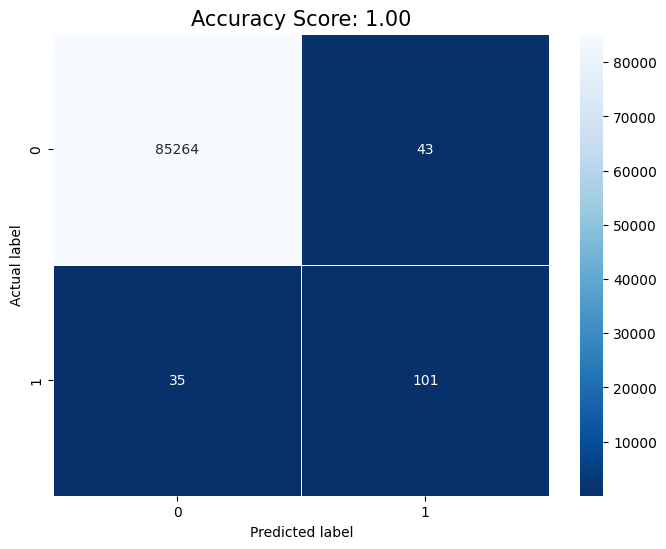

In [ ]:
# Generate and display the confusion matrix before pruning
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title(f'Accuracy Score: {accuracy:.2f}', size=15)
plt.show()

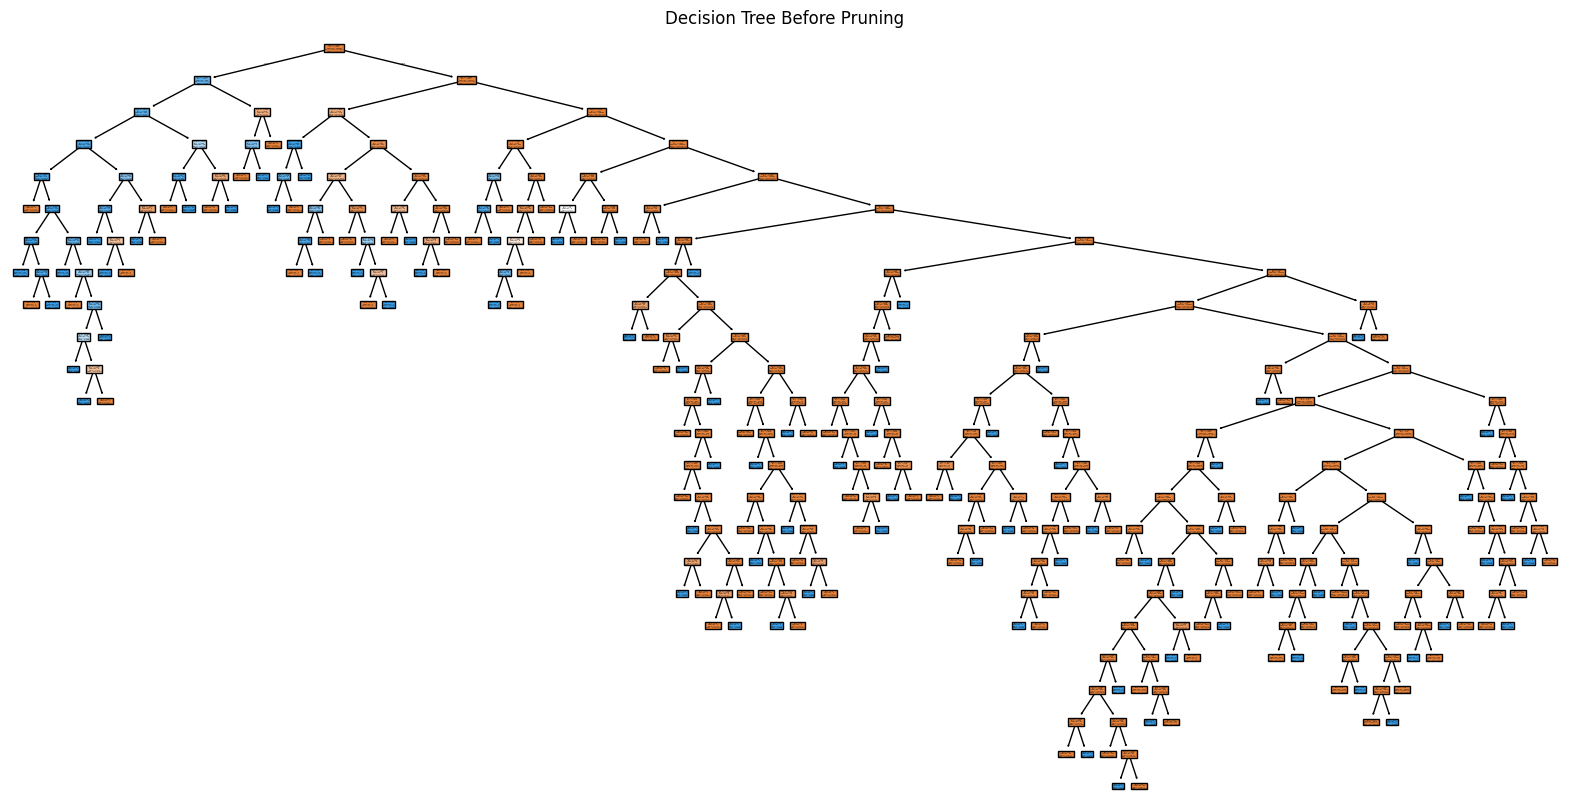

In [ ]:
# Visualize the decision tree before pruning
plt.figure(figsize=(20, 10))
tree.plot_tree(clf,
               filled=True,
               feature_names=features,
               class_names=['Non-Fraud', 'Fraud'])  # Adjust class names based on your data
plt.title("Decision Tree Before Pruning")
plt.show()

In [ ]:

# Post-pruning using Cost Complexity Pruning (CCP)
# Obtain the effective alphas and the corresponding total leaf impurities
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Initialize variables to find the best alpha
best_alpha = 0
best_accuracy = 0

# Iterate over different values of ccp_alphas to find the best one
for ccp_alpha in ccp_alphas:
    clf.set_params(ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)

    # Predict the response for the test dataset
    y_pred = clf.predict(X_test)

    # Evaluate the accuracy of the classifier
    accuracy = accuracy_score(y_test, y_pred)

    # Check if this alpha gives us the best accuracy
    if accuracy > best_accuracy:
        best_alpha = ccp_alpha
        best_accuracy = accuracy

# Train the final classifier with the best alpha
clf.set_params(ccp_alpha=best_alpha)
clf.fit(X_train, y_train)

# Predict the response for the test dataset with the pruned tree
y_pred = clf.predict(X_test)

In [ ]:
# Evaluate the accuracy of the classifier after pruning
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Decision Tree Classifier on test set after pruning: {accuracy:.2f}')

# Display a classification report after pruning
print("Classification Report after pruning:")
print(classification_report(y_test, y_pred))

Accuracy of Decision Tree Classifier on test set after pruning: 1.00
Classification Report after pruning:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.87      0.77      0.82       136

    accuracy                           1.00     85443
   macro avg       0.93      0.89      0.91     85443
weighted avg       1.00      1.00      1.00     85443



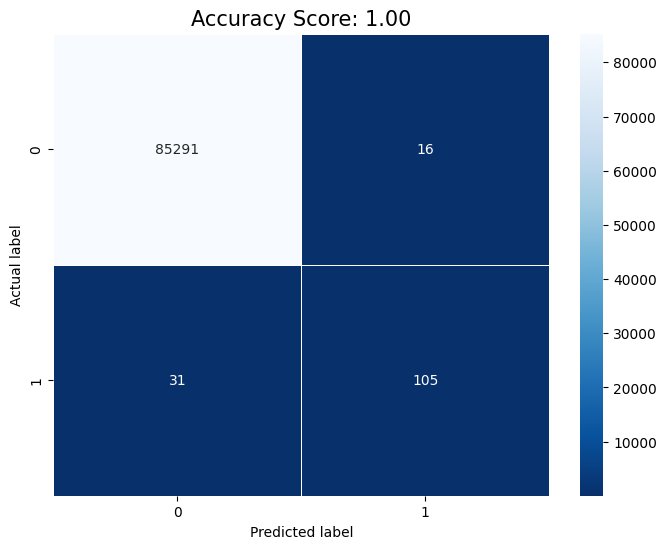

In [ ]:
# Generate and display the confusion matrix after pruning
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title(f'Accuracy Score: {accuracy:.2f}', size=15)
plt.show()

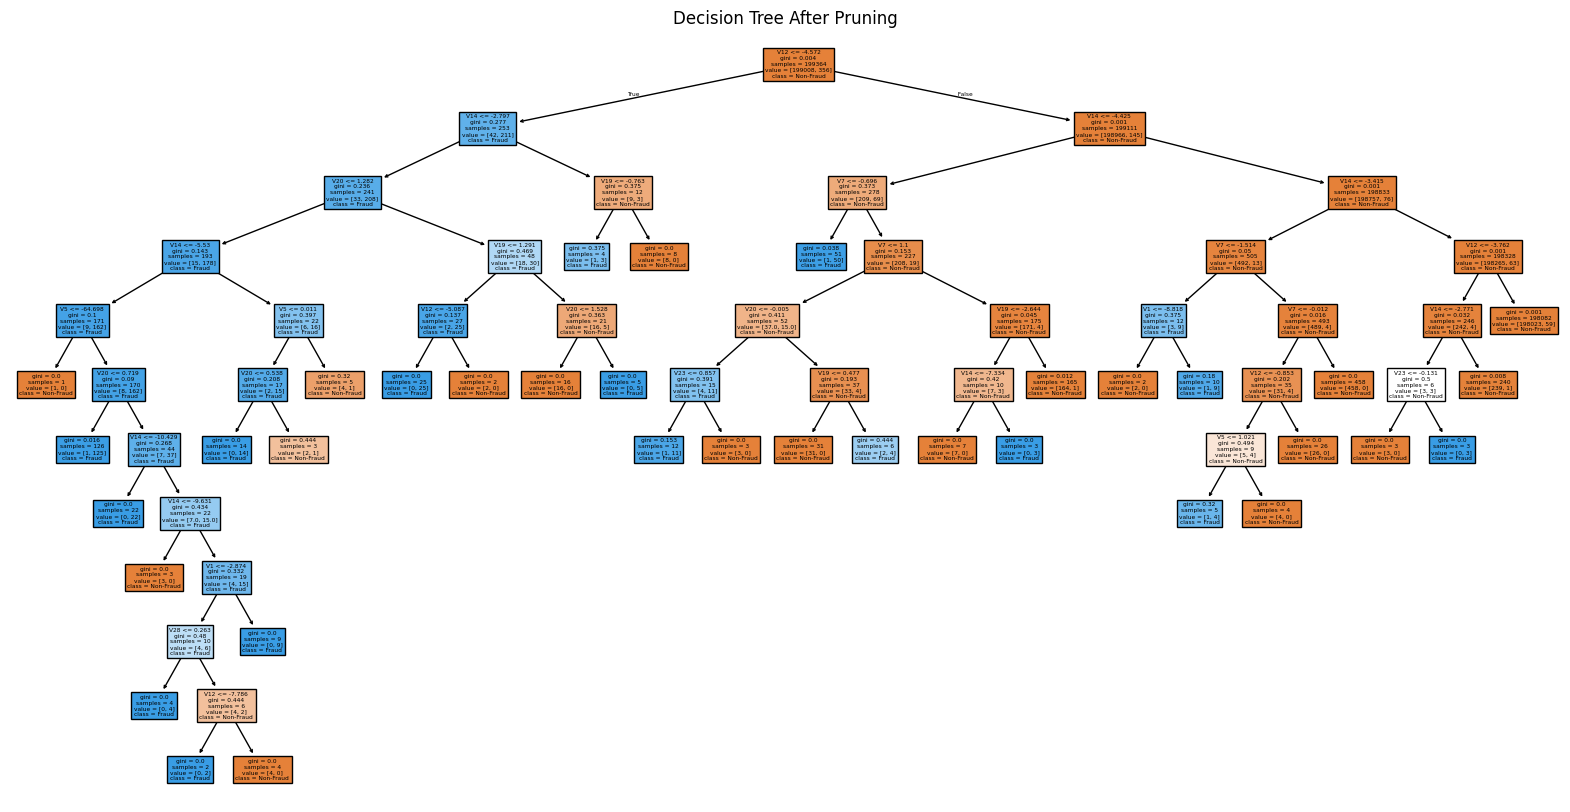

In [ ]:
# Visualize the pruned decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, filled=True, feature_names=features, class_names=['Non-Fraud', 'Fraud'])
plt.title("Decision Tree After Pruning")
plt.show()